#**Proyecto 1 - Parte 3**
##**Elaborado por:** Antonella Arcos


In [5]:
# Importar una librería
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
#Importamos librerias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('/content/drive/MyDrive/CODING_DOJO/PTCienciaDeDatos/PandasParaManipulaciónDeDatos/sales_predictions.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

En la variable peso del producto hay 1463 datos faltantes y en el tamaño de la tienda en cuanto a la superficie total que cubre hay 2410 datos faltantes

In [9]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


##A continuación hago algunas tablas para entender si los missing values son debido a algun atributo en especifico

In [10]:
df.groupby(['Outlet_Establishment_Year'])[['Item_Weight','Outlet_Size','Item_Identifier']].count()
#Se compara con Item Identifier porque es una variable que tiene observaciones completas
#Se ve que en el año 1985 ningun item tiene el peso
#Se ve que en los años 1998, 2002 y 2007 no hay el tamaño de los locales
#La data perdida no responde a un valor especifico de los datos, puede ser porque en esos años donde hay novedades no se recolecto información o se perdio con el tiempo


,Item_Weight,Outlet_Size,Item_Identifier
Outlet_Establishment_Year,,,
1985,0,1463,1463
1987,932,932,932
1997,930,930,930
1998,555,0,555
1999,930,930,930
2002,929,0,929
2004,930,930,930
2007,926,0,926
2009,928,928,928


In [11]:
df.groupby(['Outlet_Type'])[['Item_Weight','Outlet_Size','Item_Identifier']].count()
#Se compara con Item Identifier porque es una variable que tiene observaciones completas
#En grocery store falta más de la mitad de las observaciones del peso del producto y el tamaño de la tienda
#En el Supermarket Type1 faltan observaciones del tamaño de la tienda
#En el Supermarket Type3 no hay datos sobre el peso del producto

,Item_Weight,Outlet_Size,Item_Identifier
Outlet_Type,,,
Grocery Store,555,528,1083
Supermarket Type1,5577,3722,5577
Supermarket Type2,928,928,928
Supermarket Type3,0,935,935


In [12]:
#Voy a hacer una imputacion de datos faltantes con una interpolación lineal


In [13]:
df['Outlet_Size']=df.fillna(df.mode().iloc[0])
#Se lleno los vacios con la moda

In [14]:
df['Item_Weight']=df.loc[0:8523, 'Item_Weight'].interpolate(method = 'linear')
#Se hizo una interpolacion lineal

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,FDA15,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,DRC01,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,FDN15,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,FDX07,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,NCD19,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,FDF22,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,FDS36,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,NCJ29,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,FDN46,Tier 3,Supermarket Type2,1845.5976


In [24]:
loctipe = df['Outlet_Type']
itemfat = df['Item_Fat_Content']
locsize = df['Outlet_Size']
itemtipe = df['Item_Type']
numberUniqueYear = df.groupby(['Year'])['ID'].nunique()


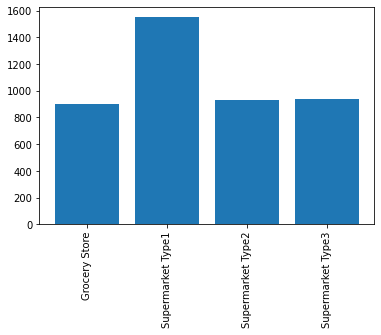

In [30]:
#Con este grafico vemos que locales son los que tienen mas tipos de items unicos
#Podemos identificar donde podriamos poner promociones porque hay más productos para abastecer la demanda 
plt.bar(localtipe.index, localtipe.values);
plt.xticks(rotation = 90);

In [98]:
sales = df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()
sales

Outlet_Type
Grocery Store        3.680343e+05
Supermarket Type1    1.291734e+07
Supermarket Type2    1.851823e+06
Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

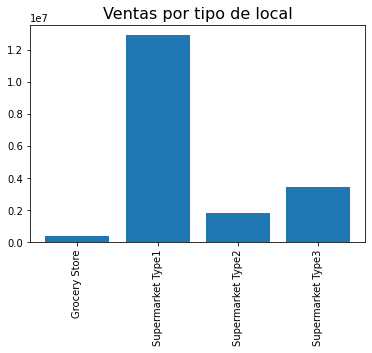

In [99]:
#Consistente con el gráfico anterior, la mayoria de ventas viene los supermercados tipo 1
plt.bar(sales.index, sales.values);
plt.xticks(rotation = 90);
plt.title('Ventas por tipo de local', fontsize = 16)
plt.show()

In [28]:
localtipe = df.groupby(['Outlet_Type'])['Item_Identifier'].nunique()
localtipe

Outlet_Type
Grocery Store         901
Supermarket Type1    1550
Supermarket Type2     928
Supermarket Type3     935
Name: Item_Identifier, dtype: int64

In [33]:
localtipefat = df.groupby(['Outlet_Type','Item_Fat_Content'])['Item_Fat_Content'].count()
localtipefat

Outlet_Type        Item_Fat_Content
Grocery Store      LF                    45
                   Low Fat              642
                   Regular              364
                   low fat               18
                   reg                   14
Supermarket Type1  LF                   192
                   Low Fat             3347
                   Regular             1889
                   low fat               70
                   reg                   79
Supermarket Type2  LF                    42
                   Low Fat              547
                   Regular              312
                   low fat                9
                   reg                   18
Supermarket Type3  LF                    37
                   Low Fat              553
                   Regular              324
                   low fat               15
                   reg                    6
Name: Item_Fat_Content, dtype: int64

In [45]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat'],['Low Fat','Low Fat'])
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'],['Regular'])

In [71]:
localtipefat = df.groupby(['Item_Fat_Content','Outlet_Type'])['Item_Fat_Content'].count()
localtipefat

Item_Fat_Content  Outlet_Type      
Low Fat           Grocery Store         705
                  Supermarket Type1    3609
                  Supermarket Type2     598
                  Supermarket Type3     605
Regular           Grocery Store         378
                  Supermarket Type1    1968
                  Supermarket Type2     330
                  Supermarket Type3     330
Name: Item_Fat_Content, dtype: int64

In [81]:
fat = df.groupby(['Item_Fat_Content'])['Item_Identifier'].nunique()
fat
#plt.plot(month,list5,c='black')
#listlf = localtipefat['Item_Fat_Content']=="Low Fat"


#plt.bar(localtipefat.index, localtipefat.values);
#plt.xticks(rotation = 90);


#plt.bar(x, y1, color='r')
#plt.bar(x, y2, bottom=y1, color='b')
#plt.show()

Item_Fat_Content
Low Fat    1008
Regular     551
Name: Item_Identifier, dtype: int64

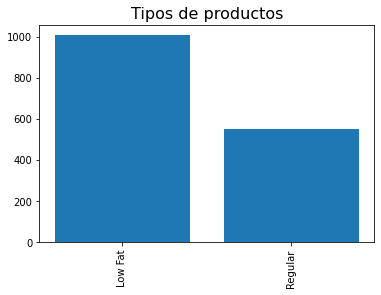

In [95]:
#Con este grafico vemos que la mayoria de items son low fat. Permite identificar que nuestros clientes potenciales son aquellos que consumen este tipo de comida
plt.bar(fat.index, fat.values);
plt.xticks(rotation = 90);
plt.title('Tipos de productos', fontsize = 16)
plt.show()

In [102]:
fatsales = df.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].sum()
fatsales

Item_Fat_Content
Low Fat    1.190409e+07
Regular    6.687031e+06
Name: Item_Outlet_Sales, dtype: float64

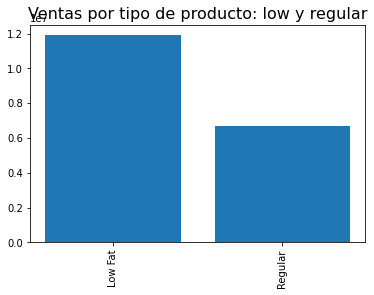

In [104]:
#Consistente con el grafico anterior la mayoria de las ventas vienen de los productos low fat 
plt.bar(fatsales.index, fatsales.values);
plt.xticks(rotation = 90);
plt.title('Ventas por tipo de producto: low y regular', fontsize = 16)
plt.show()

In [100]:
itemtipe = df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum()
itemtipe

Item_Type
Baking Goods             1.265525e+06
Breads                   5.532372e+05
Breakfast                2.322990e+05
Canned                   1.444151e+06
Dairy                    1.522594e+06
Frozen Foods             1.825735e+06
Fruits and Vegetables    2.820060e+06
Hard Drinks              4.577934e+05
Health and Hygiene       1.045200e+06
Household                2.055494e+06
Meat                     9.175656e+05
Others                   3.255176e+05
Seafood                  1.488682e+05
Snack Foods              2.732786e+06
Soft Drinks              8.928977e+05
Starchy Foods            3.514013e+05
Name: Item_Outlet_Sales, dtype: float64

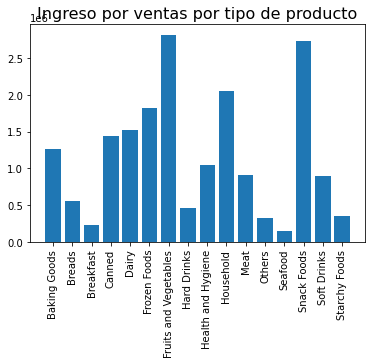

In [106]:
#Los productos producen más ingresos por ventas son Frutas y Vegetales, Household y Snack Foods
plt.bar(itemtipe.index, itemtipe.values);
plt.xticks(rotation = 90);
plt.title('Ingreso por ventas por tipo de producto', fontsize = 16)
plt.show()

In [105]:
itemtipe1 = df.groupby(['Item_Type'])['Item_Outlet_Sales'].count()
itemtipe1

Item_Type
Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
Name: Item_Outlet_Sales, dtype: int64

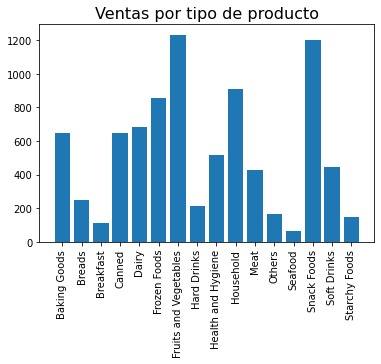

In [107]:
plt.bar(itemtipe1.index, itemtipe1.values);
plt.xticks(rotation = 90);
plt.title('Ventas por tipo de producto', fontsize = 16)
plt.show()